# Random walk repartition for each graph

Go to parent folder to make imports works.

In [3]:
import os
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from tqdm import tqdm
from objects.recipe_machine import RecipeMachine

# Generate 5000 random walks
rd_walks = [
    RecipeMachine.get_random_walk()
    for _ in tqdm(range(5000), desc="Generating random walks")
]

Generating random walks: 100%|██████████| 5000/5000 [02:07<00:00, 39.31it/s]


Count each transition and states

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# make a graph counting state and transitions in the random walks
state_count = {}
transition_count = {}

for walk in tqdm(rd_walks, desc="Counting states and transitions"):
    for state, transition in walk:
        if state not in state_count:
            state_count[state] = 0
        state_count[state] += 1

        if transition not in transition_count:
            transition_count[transition] = 0
        transition_count[transition] += 1

Counting states and transitions: 100%|██████████| 5000/5000 [00:00<00:00, 400250.40it/s]


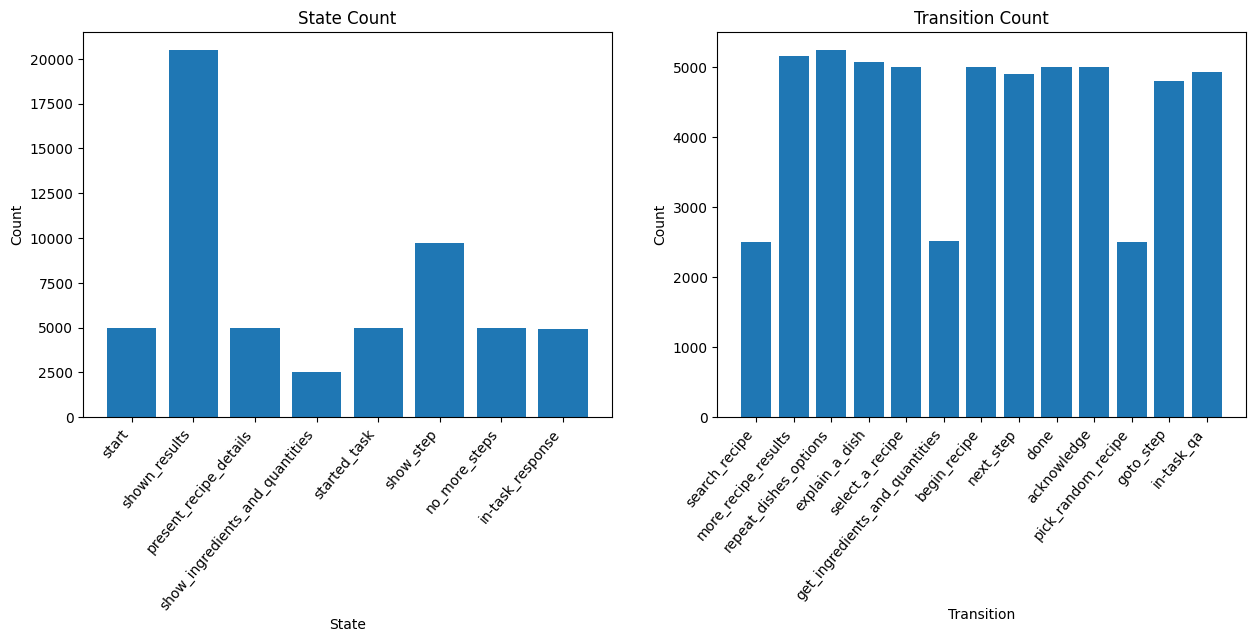

In [6]:
# plot the state count and transition count side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].bar(state_count.keys(), state_count.values())
ax[0].set_title("State Count")
ax[0].set_xlabel("State")
ax[0].set_ylabel("Count")
plt.sca(ax[0])
plt.xticks(
    rotation=50, ha="right"
)  # Apply rotation to x-axis labels of first subplot and align them to the right
ax[1].bar(transition_count.keys(), transition_count.values())
ax[1].set_title("Transition Count")
ax[1].set_xlabel("Transition")
ax[1].set_ylabel("Count")
plt.sca(ax[1])
plt.xticks(
    rotation=50, ha="right"
)  # Apply rotation to x-axis labels of second subplot and align them to the right
plt.show()

In [7]:
# Compute, for each state, the probability of taking each transition
# Create a nested dictionary to store the count of each transition from each state
sm = RecipeMachine()
state_transition_count = {
    state: {transition: 0 for transition in sm.transitions_graph[state].keys()}
    for state in sm.transitions_graph.keys()
}

# Count the transitions from each state
for walk in tqdm(rd_walks, desc="Counting transitions from each state"):
    for state, transition in walk:
        state_transition_count[state][transition] += 1

# Compute the probability of each transition from each state
state_transition_prob = {state: {} for state in sm.transitions_graph.keys()}
for state, transitions in state_transition_count.items():
    total_transitions = sum(transitions.values())
    for transition, count in transitions.items():
        state_transition_prob[state][transition] = count / total_transitions

Counting transitions from each state: 100%|██████████| 5000/5000 [00:00<00:00, 649413.80it/s]


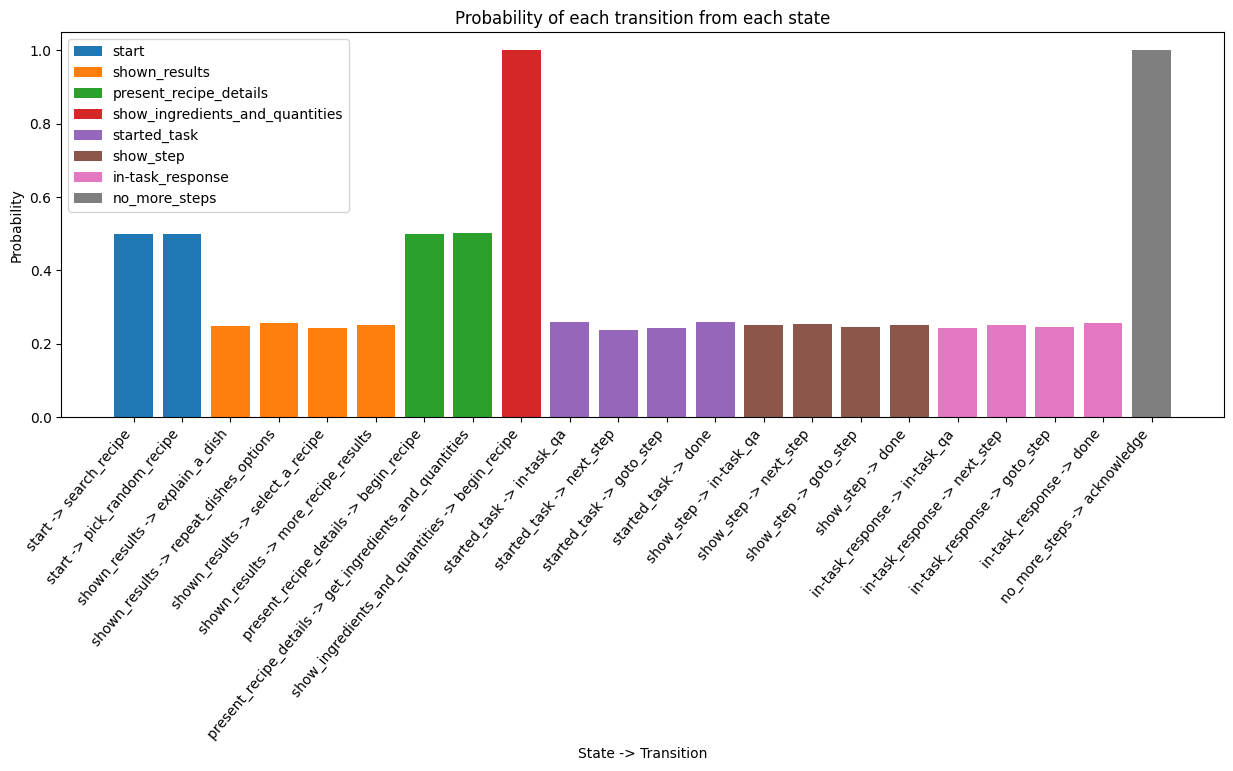

In [8]:
# Plot the probability of each transition from each state
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
for state, transitions in state_transition_prob.items():
    ax.bar(
        [f"{state} -> {transition}" for transition in transitions.keys()],
        transitions.values(),
        label=state,
    )
ax.set_title("Probability of each transition from each state")
ax.set_xlabel("State -> Transition")
ax.set_ylabel("Probability")
plt.xticks(
    rotation=50, ha="right"
)  # Apply rotation to x-axis labels of the subplot and align them to the right
plt.legend()
plt.show()